<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 100px;">
    <h1 style="margin: 0;">Classificação de Autismo: Análise de Distâncias Faciais</h1>
</div>


Este notebook tem como objetivo classificar o autismo com base em medições de distâncias faciais. Usaremos conjuntos de dados contendo distâncias calculadas a partir de marcos faciais para indivíduos com e sem autismo. A classificação será realizada utilizando os algoritmos K-Nearest Neighbors (KNN) e Random Forest.

## Tabela de Conteúdos

1. [Importação de Bibliotecas](#importação-de-bibliotecas)
2. [Carregamento dos Dados](#carregamento-dos-dados)
3. [Pré-processamento de Dados](#pré-processamento-de-dados)
4. [Análise Exploratória de Dados](#análise-exploratória-de-dados)
5. [Treinamento e Avaliação do Modelo](#treinamento-e-avaliação-do-modelo)
   - [K-Nearest Neighbors (KNN)](#k-nearest-neighbors-knn)
   - [Classificador Random Forest](#classificador-random-forest)


### Importando bibliotecas


In [1]:
#importação-de-bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 70px;">
    <h2 style="margin: 0;">Utilizando landmark de 68 pontos</h2>
</div>

Carregar os conjuntos de dados contendo as distâncias faciais para indivíduos com e sem autismo.


<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 70px;">
    <h3 style="margin: 0;">Carregamento de dados</h3>
</div>

Carregar os conjuntos de dados contendo as distâncias faciais para indivíduos com e sem autismo.


In [2]:
# Carregar os conjuntos de dados
df_no_autism = pd.read_csv("../../data/preprocessed_landmark/distances_no_autism.csv")
df_with_autism = pd.read_csv("../../data/preprocessed_landmark/distances_with_autism.csv")

# Combinar os conjuntos de dados
data_total = pd.concat([df_no_autism, df_with_autism], ignore_index=True)


### Pré-processamento de Dados

Padronizar as características relevantes para melhorar o desempenho dos modelos de aprendizado de máquina.


In [3]:
# Pré-processar os dados
standardScaler = StandardScaler()

# Selecionar colunas a serem padronizadas (atualize com base nas suas colunas de distância)
columns_to_scale = ['middle_facial_height', 'lower_facial_height', 
                    'philtrum', 'intercanthal_width', 'biocular_width', 'nasal_width', 'mouth_width']

data_total[columns_to_scale] = standardScaler.fit_transform(data_total[columns_to_scale])


<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 70px;">
    <h3 style="margin: 0;">Análise Exploratória de Dados
</h3>
</div>

Análise exploratória inicial para entender melhor o conjunto de dados.


      samples  class  middle_facial_height  lower_facial_height  philtrum  \
0         2.0    0.0              0.178190             0.119158  0.496468   
1         3.0    0.0              0.557849             0.454658  0.479162   
2         5.0    0.0              0.276720             0.132265  0.951754   
3         6.0    0.0              0.359131             1.749756  0.757109   
4         7.0    0.0              0.282901             0.487104  0.547597   
...       ...    ...                   ...                  ...       ...   
2156   1462.0    1.0              0.638452             1.717460  1.204492   
2157   1463.0    1.0              0.304676             0.306685  1.748727   
2158   1465.0    1.0              0.037475             0.646759  0.757131   
2159   1466.0    1.0              0.374542             0.108698  0.494735   
2160   1468.0    1.0              0.189151             0.968810  0.760257   

      intercanthal_width  biocular_width  nasal_width  mouth_width  
0     

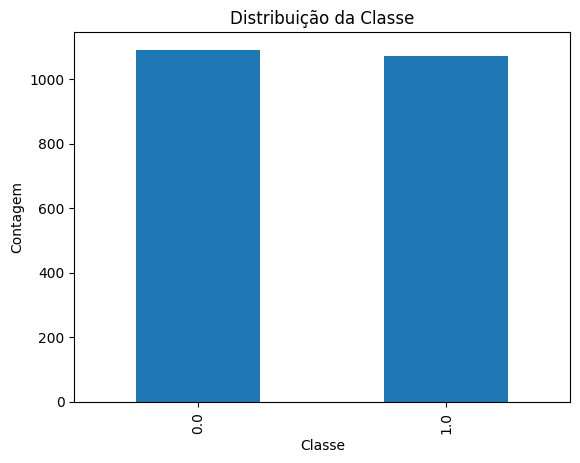

In [4]:
# Verificar a distribuição da variável alvo
data_total['class'].value_counts().plot(kind='bar', title='Distribuição da Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')

# Removendo linhas onde qualquer uma das colunas especificadas contém dados nulos
data_total_cleaned = data_total.dropna(subset=columns_to_scale)
data_total_cleaned[columns_to_scale] = data_total_cleaned[columns_to_scale].abs()

# Para verificar o resultado
print(data_total_cleaned)

In [5]:
# Calcular a correlação entre as variáveis numéricas e a variável de saída 'class'
correlation_matrix = data_total_cleaned.corr()

# Exibir a correlação da variável 'class' com as outras
correlation_with_class = correlation_matrix['class'].sort_values(ascending=False)

# Mostrar a correlação
print(correlation_with_class)



class                   1.000000
samples                 0.082431
lower_facial_height     0.061634
philtrum                0.012355
middle_facial_height   -0.005832
nasal_width            -0.068564
mouth_width            -0.087469
intercanthal_width     -0.113888
biocular_width         -0.115677
Name: class, dtype: float64


<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 70px;">
    <h3 style="margin: 0;">Treinamento e Avaliação do Modelo</h3>
</div>

 <br></br>

<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">K-Nearest Neighbors (KNN)</h4>
</div>


Treinar um classificador KNN e avaliar seu desempenho usando validação cruzada.


      middle_facial_height  lower_facial_height  philtrum  intercanthal_width  \
0                 0.178190             0.119158  0.496468            0.948233   
1                 0.557849             0.454658  0.479162            0.283105   
2                 0.276720             0.132265  0.951754            0.511606   
3                 0.359131             1.749756  0.757109            0.346921   
4                 0.282901             0.487104  0.547597            0.114616   
...                    ...                  ...       ...                 ...   
2156              0.638452             1.717460  1.204492            0.103296   
2157              0.304676             0.306685  1.748727            0.190627   
2158              0.037475             0.646759  0.757131            0.039378   
2159              0.374542             0.108698  0.494735            0.251433   
2160              0.189151             0.968810  0.760257            0.755354   

      biocular_width  nasal

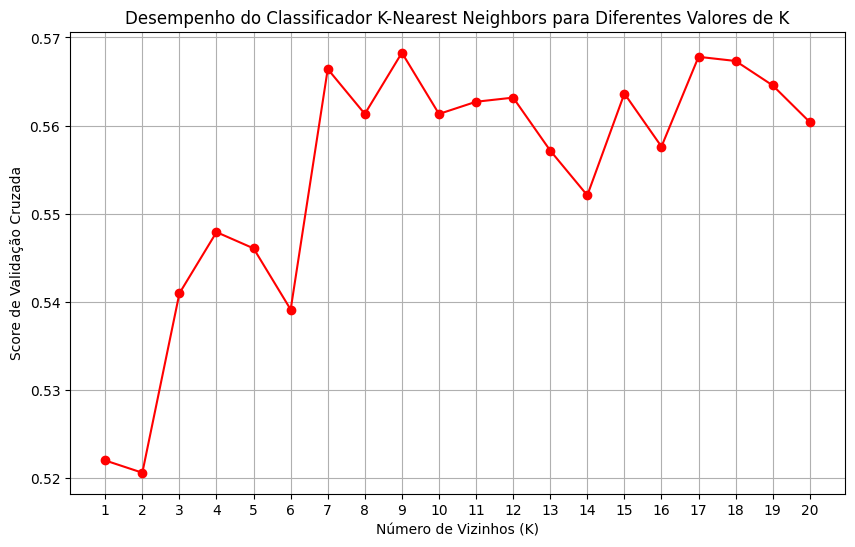

In [7]:
# Dividir os dados em características e variável alvo
y = data_total_cleaned['class']
 # Remover as colunas 'class' e 'samples'
X = data_total_cleaned.drop(['class', 'samples'], axis=1)

print(X)
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo KNN
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_scores.append(score.mean())

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), knn_scores, color='red', marker='o')
plt.title('Desempenho do Classificador K-Nearest Neighbors para Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Score de Validação Cruzada')
plt.xticks(range(1, 21))
plt.grid()
plt.show()


<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Classificador Random Forest</h4>
</div>

Treinar um classificador Random Forest e avaliar seu desempenho.


In [27]:
# Treinar o modelo Random Forest
randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_score = cross_val_score(randomforest_classifier, X, y, cv=10)
print("Score do Random Forest: ", rf_score.mean())

Score do Random Forest:  0.5608358934971839


<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Tentativa utilizando apenas dados mais correlacionados</h4>
</div>

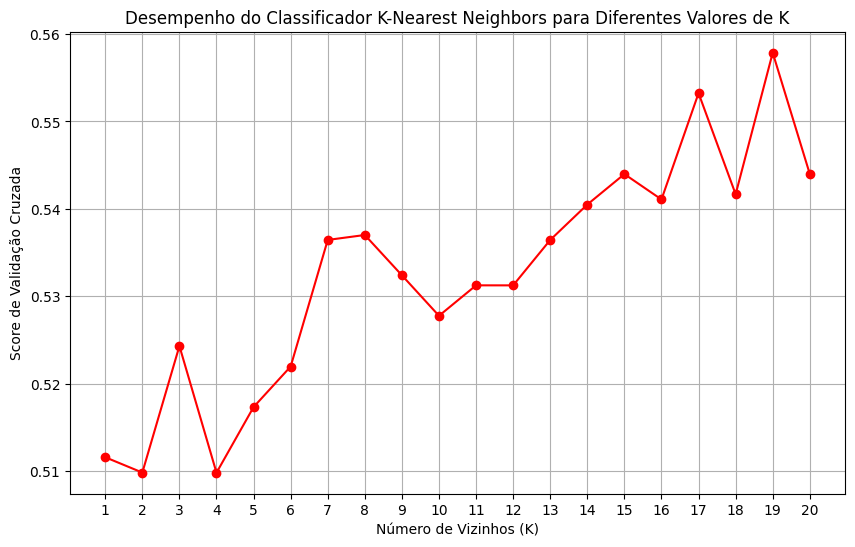

Desempenho do modelo KNN com K=1 no conjunto de teste: 0.5612


In [28]:
# Selecionar as três variáveis mais correlacionadas com a classe
selected_features = ['biocular_width', 'intercanthal_width', 'middle_facial_height']

# Dividir os dados em características (X) e variável alvo (y)
y = data_total_cleaned['class']
X = data_total_cleaned[selected_features]  # Apenas as variáveis selecionadas

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo KNN
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X_train, y_train, cv=10)  # Usar apenas o conjunto de treinamento
    knn_scores.append(score.mean())

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), knn_scores, color='red', marker='o')
plt.title('Desempenho do Classificador K-Nearest Neighbors para Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Score de Validação Cruzada')
plt.xticks(range(1, 21))
plt.grid()
plt.show()

# Testar com K=1 (melhor resultado)
best_k = 1
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

# Avaliar o desempenho no conjunto de teste
test_score = knn_classifier.score(X_test, y_test)
print(f"Desempenho do modelo KNN com K={best_k} no conjunto de teste: {test_score:.4f}")


In [29]:
# Treinar o modelo Random Forest
randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_score = cross_val_score(randomforest_classifier, X, y, cv=10)
print("Score do Random Forest: ", rf_score.mean())

Score do Random Forest:  0.5478985321727257


In [32]:
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros que serão testados
param_grid = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Fazer a busca em grade
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Ver os melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Testar o modelo com os melhores parâmetros no conjunto de teste
best_knn = grid_search.best_estimator_
test_score = best_knn.score(X_test, y_test)
print(f"Desempenho do modelo KNN com os melhores parâmetros no conjunto de teste: {test_score:.4f}")


Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
Desempenho do modelo KNN com os melhores parâmetros no conjunto de teste: 0.5751


In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

# Dividir os dados em características (X) e variável alvo (y)
y = data_total_cleaned['class']
X = data_total_cleaned[selected_features]  # Apenas as variáveis selecionadas

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir os parâmetros para o SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parâmetro de regularização
    'gamma': ['scale', 'auto'],  # Coeficiente da função kernel
    'kernel': ['rbf', 'linear']  # Tipos de kernel a serem testados
}

# Fazer a busca em grade para otimizar os hiperparâmetros
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Testar o modelo com os melhores parâmetros no conjunto de teste
best_svm = grid_search.best_estimator_
test_score = best_svm.score(X_test, y_test)
print(f"Desempenho do modelo SVM com os melhores parâmetros no conjunto de teste: {test_score:.4f}")


Melhores parâmetros: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Desempenho do modelo SVM com os melhores parâmetros no conjunto de teste: 0.5935


In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Dividir os dados em características (X) e variável alvo (y)
y = data_total_cleaned['class']
X = data_total_cleaned[selected_features]  # Apenas as variáveis selecionadas

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir os parâmetros para o MLP
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (100,)],  # Testar diferentes tamanhos de camadas ocultas
    'activation': ['relu', 'tanh'],  # Funções de ativação
    'solver': ['adam', 'sgd'],  # Otimizadores
    'learning_rate': ['constant', 'adaptive'],  # Taxa de aprendizado
}

# Fazer a busca em grade para otimizar os hiperparâmetros
grid_search = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Testar o modelo com os melhores parâmetros no conjunto de teste
best_mlp = grid_search.best_estimator_
test_score = best_mlp.score(X_test, y_test)
print(f"Desempenho do modelo MLP com os melhores parâmetros no conjunto de teste: {test_score:.4f}")


c:\Users\georg\Desktop\Analise_Autismo\AutismDetectWithML\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores parâmetros: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Desempenho do modelo MLP com os melhores parâmetros no conjunto de teste: 0.5774


<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 70px;">
    <h2 style="margin: 0;">Utilizando 3D Face Mesh</h2>
</div>

Carregar os conjuntos de dados contendo as distâncias faciais para indivíduos com e sem autismo.

Abaixo, vê-se testes apenas com o dataset pós alterações, o objetivo destas etapas é realmente identificar qual algoritmo vai obter maior precisão e documentar levemente a ordenação dos resultados e das tratativas para conseguir tal melhoria, então não necessáriamente cada tentativa será feita para os dois landmarks obtidos, porém, caso seja concluido que esse dataset é o que será realmente utilizado e que, por sua vezes, seram estes algoritmos, ai será refeito para ambos método spara ter uma comparação mais precisa.

<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Testando SVM</h4>
</div>

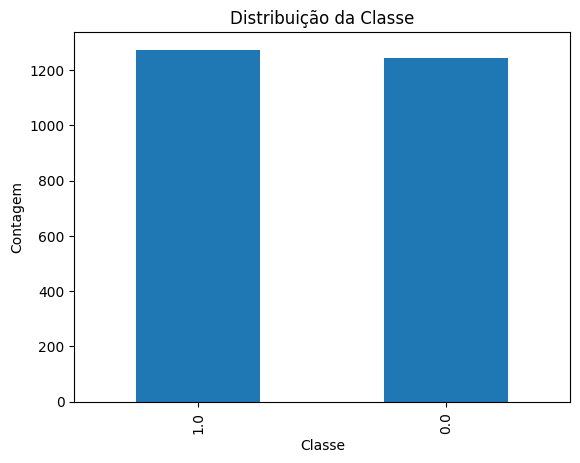

Melhores parâmetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Desempenho do modelo SVM com os melhores parâmetros no conjunto de teste: 0.7500


In [7]:
# -*- coding: utf-8 -*-
"""
Classificação com SVM usando Medidas Antropométricas do Face Mesh 3D
======================================================================
Este código utiliza um modelo de Support Vector Machine (SVM) para classificar
as medidas antropométricas extraídas a partir de um Face Mesh 3D.

Criado em: Sexta-feira, dia 27 de Setembro de 2024
Última modificação em: Sexta-feira, dia 27 de Setembro de 2024

@author: George Flores
"""

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Carregar os conjuntos de dados
input_csv_no_autism_path = "../../data/preprocessed_landmark/face_mesh_distances_no_autism_3.0.csv"
input_csv_with_autism_path = "../../data/preprocessed_landmark/face_mesh_distances_with_autism_3.0.csv"

df_no_autism = pd.read_csv(input_csv_no_autism_path)
df_with_autism = pd.read_csv(input_csv_with_autism_path)

# Concatenar os dois DataFrames para formar o conjunto total de dados
data_total = pd.concat([df_no_autism, df_with_autism], ignore_index=True)

# Verificar a distribuição da variável alvo
data_total['class'].value_counts().plot(kind='bar', title='Distribuição da Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Remover linhas onde qualquer uma das colunas especificadas contém dados nulos
columns_to_scale = [col for col in data_total.columns if col not in ['samples', 'class']]
data_total_cleaned = data_total.dropna(subset=columns_to_scale)

# Garantir que os valores sejam positivos
data_total_cleaned[columns_to_scale] = data_total_cleaned[columns_to_scale].abs()

# Dividir os dados em características (X) e variável alvo (y)
y = data_total_cleaned['class']
X = data_total_cleaned[columns_to_scale]

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir os parâmetros para o SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parâmetro de regularização
    'gamma': ['scale', 'auto'],  # Coeficiente da função kernel
    'kernel': ['rbf', 'linear']  # Tipos de kernel a serem testados
}

# Fazer a busca em grade para otimizar os hiperparâmetros
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Testar o modelo com os melhores parâmetros no conjunto de teste
best_svm = grid_search.best_estimator_
test_score = best_svm.score(X_test, y_test)
print(f"Desempenho do modelo SVM com os melhores parâmetros no conjunto de teste: {test_score:.4f}")

<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Correlação dos dados</h4>
</div>

In [5]:
# Calcular a correlação entre as variáveis numéricas e a variável de saída 'class'
correlation_matrix = data_total_cleaned.corr()

# Exibir a correlação da variável 'class' com as outras
correlation_with_class = correlation_matrix['class'].sort_values(ascending=False)

# Mostrar a correlação
print(correlation_with_class)



class    1.000000
Y10      0.320082
Y109     0.318635
Y338     0.314030
Y67      0.308812
           ...   
Z456    -0.325572
Z5      -0.332326
Z195    -0.332955
Z248    -0.335094
Z281    -0.335697
Name: class, Length: 1406, dtype: float64


In [10]:
# Calcular a correlação entre as variáveis numéricas e a variável de saída 'class'
correlation_matrix = data_total_cleaned.corr()

# Exibir a correlação da variável 'class' com as outras
correlation_with_class = correlation_matrix['class'].sort_values(ascending=False)

# Mostrar a correlação
print(correlation_with_class)



class                                    1.000000
samples                                  0.020642
cheilion_left_christa_philtri_right     -0.100225
christa_philtri_right_cheilion_left     -0.100225
cheilion_left_lower_philtrum            -0.120365
cheilion_left_christa_philtri_left      -0.137910
philtrum_height                         -0.139333
cheilion_left_pogonion                  -0.154398
cheilion_right_christa_philtri_left     -0.159301
christa_philtri_left_cheilion_right     -0.159301
christa_philtri_left_lower_philtrum     -0.168314
cheilion_right_lower_philtrum           -0.174378
cheilion_right_christa_philtri_right    -0.177797
mouth_width                             -0.187790
cheilion_left_cheilion_right            -0.187790
endo_canthus_glabella_left              -0.215325
middle_facial_height                    -0.218235
nasal_width                             -0.236744
endo_canthus_glabella_right             -0.243891
frontozygomaticus_exo_cantus_right      -0.253253


<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Testando SVM utilizando todos pontos da Face Mesh</h4>
</div>

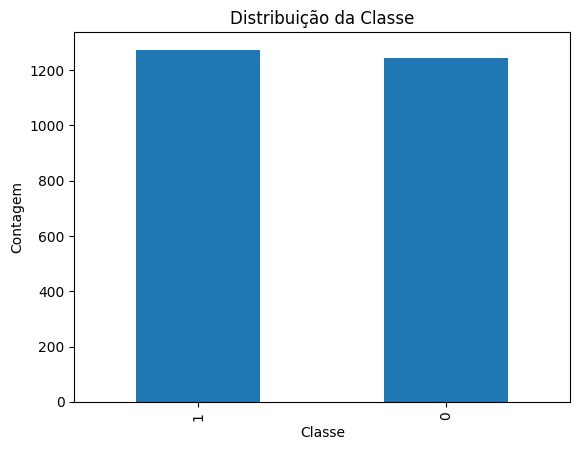

KeyboardInterrupt: 

In [8]:
# -*- coding: utf-8 -*-
"""
Classificação com SVM usando Medidas Antropométricas do Face Mesh 3D
======================================================================
Este código utiliza um modelo de Support Vector Machine (SVM) para classificar
as medidas antropométricas extraídas a partir de um Face Mesh 3D.

Criado em: Sexta-feira, dia 27 de Setembro de 2024
Última modificação em: Sexta-feira, dia 27 de Setembro de 2024

@author: George Flores
"""

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Carregar os conjuntos de dados
input_csv_no_autism_path = "../../data/preprocessed_landmark/face_mesh_no_autism_3.0.csv"
input_csv_with_autism_path = "../../data/preprocessed_landmark/face_mesh_with_autism_3.0.csv"

df_no_autism = pd.read_csv(input_csv_no_autism_path)
df_with_autism = pd.read_csv(input_csv_with_autism_path)

# Concatenar os dois DataFrames para formar o conjunto total de dados
data_total = pd.concat([df_no_autism, df_with_autism], ignore_index=True)

# Verificar a distribuição da variável alvo
data_total['class'].value_counts().plot(kind='bar', title='Distribuição da Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Remover linhas onde qualquer uma das colunas especificadas contém dados nulos
columns_to_scale = [col for col in data_total.columns if col not in ['samples', 'class']]
data_total_cleaned = data_total.dropna(subset=columns_to_scale)

# Garantir que os valores sejam positivos
data_total_cleaned[columns_to_scale] = data_total_cleaned[columns_to_scale].abs()

# Dividir os dados em características (X) e variável alvo (y)
y = data_total_cleaned['class']
X = data_total_cleaned[columns_to_scale]

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir os parâmetros para o SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parâmetro de regularização
    'gamma': ['scale', 'auto'],  # Coeficiente da função kernel
    'kernel': ['rbf', 'linear']  # Tipos de kernel a serem testados
}

# Fazer a busca em grade para otimizar os hiperparâmetros
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Testar o modelo com os melhores parâmetros no conjunto de teste
best_svm = grid_search.best_estimator_
test_score = best_svm.score(X_test, y_test)
print(f"Desempenho do modelo SVM com os melhores parâmetros no conjunto de teste: {test_score:.4f}")

<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Teste com técnicas de redução de dimensianibilidade e escalonamento.</h4>
</div>


In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonamento padrão (como já estava sendo feito)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# PCA com Escalonamento Padrão
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Parâmetros do SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Treinar e testar para Escalonamento Padrão
grid_search_std = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
grid_search_std.fit(X_train_std, y_train)
best_svm_std = grid_search_std.best_estimator_
test_score_std = best_svm_std.score(X_test_std, y_test)

# Treinar e testar para Min-Max Scaling
grid_search_minmax = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
grid_search_minmax.fit(X_train_minmax, y_train)
best_svm_minmax = grid_search_minmax.best_estimator_
test_score_minmax = best_svm_minmax.score(X_test_minmax, y_test)

# Treinar e testar para PCA
grid_search_pca = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
grid_search_pca.fit(X_train_pca, y_train)
best_svm_pca = grid_search_pca.best_estimator_
test_score_pca = best_svm_pca.score(X_test_pca, y_test)

# Resultados
print(f"Desempenho com Escalonamento Padrão: {test_score_std:.4f}")
print(f"Desempenho com Min-Max Scaling: {test_score_minmax:.4f}")
print(f"Desempenho com PCA: {test_score_pca:.4f}")


Desempenho com Escalonamento Padrão: 0.7500
Desempenho com Min-Max Scaling: 0.7540
Desempenho com PCA: 0.6567



<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Testado rede neural</h4>
</div>


c:\Users\georg\Desktop\Analise_Autismo\AutismDetectWithML\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6314 - loss: 0.6322 - val_accuracy: 0.7004 - val_loss: 0.5917
Epoch 2/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7071 - loss: 0.5583 - val_accuracy: 0.6825 - val_loss: 0.5905
Epoch 3/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7216 - loss: 0.5382 - val_accuracy: 0.6885 - val_loss: 0.5802
Epoch 4/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7539 - loss: 0.5108 - val_accuracy: 0.6825 - val_loss: 0.5820
Epoch 5/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7254 - loss: 0.5182 - val_accuracy: 0.6964 - val_loss: 0.5725
Epoch 6/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7590 - loss: 0.4958 - val_accuracy: 0.6925 - val_loss: 0.5719
Epoch 7/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7327 - loss: 0.4976 - val_accuracy: 0.7143 - val_loss: 0.5689
Epoch 8/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7479 - loss: 0.4970 - val_accuracy: 0.7143 - 

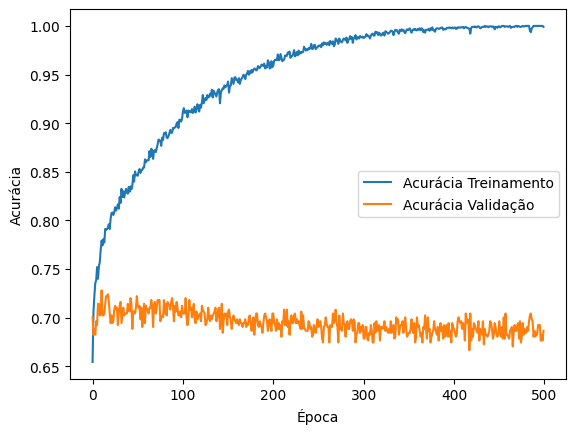

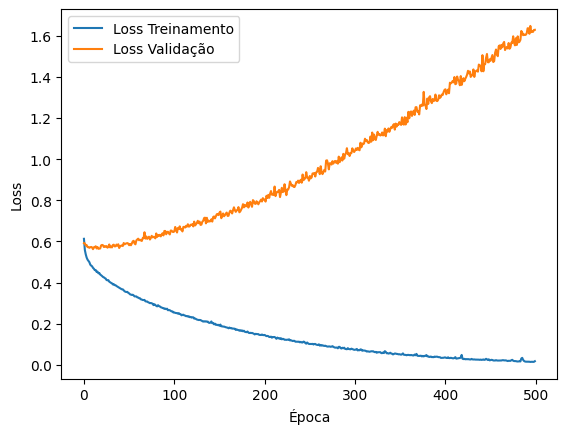

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir o modelo da Rede Neural
model = Sequential()

# Camada de entrada (input_dim = número de características)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Camada oculta
model.add(Dense(32, activation='relu'))

# Camada de saída (neuron = 1, ativação sigmoid para classificação binária)
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Treinar a rede neural
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

# Avaliar o desempenho no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Desempenho no conjunto de teste - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

# Plotar o histórico de treinamento
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/150


c:\Users\georg\Desktop\Analise_Autismo\AutismDetectWithML\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5850 - loss: 0.6658 - val_accuracy: 0.6409 - val_loss: 0.6397
Epoch 2/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6404 - loss: 0.6268 - val_accuracy: 0.6548 - val_loss: 0.6492
Epoch 3/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6571 - loss: 0.6218 - val_accuracy: 0.6429 - val_loss: 0.6298
Epoch 4/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6628 - loss: 0.6160 - val_accuracy: 0.6409 - val_loss: 0.6295
Epoch 5/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6658 - loss: 0.6004 - val_accuracy: 0.6508 - val_loss: 0.6237
Epoch 6/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6630 - loss: 0.6102 - val_accuracy: 0.6448 - val_loss: 0.6263
Epoch 7/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6770 - loss: 0.6035 - val_accuracy: 0.6349 - val_loss: 0.6694
Epoch 8/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6543 - loss: 0.6139 - val_accuracy: 0.5972 - val_loss: 0.

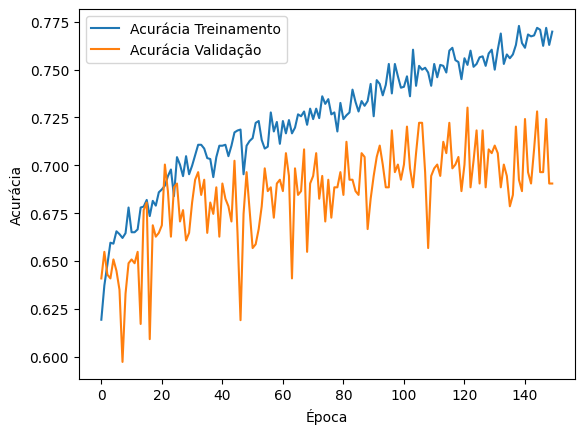

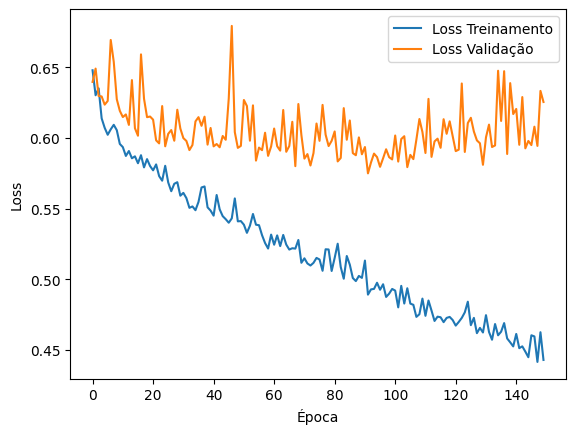

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Min-Max Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir o modelo da Rede Neural
model = Sequential()

# Camada de entrada (input_dim = número de características)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Camada oculta
model.add(Dense(32, activation='relu'))

# Camada de saída (neuron = 1, ativação sigmoid para classificação binária)
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Treinar a rede neural por 150 épocas
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

# Avaliar o desempenho no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Desempenho no conjunto de teste - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

# Plotar o histórico de treinamento
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()



<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Testando RandomForest</h4>
</div>


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Carregar os arquivos CSV
df_no_autism_anthropometric = pd.read_csv("../../data/preprocessed_landmark/face_mesh_distances_no_autism_3.0.csv")
df_with_autism_anthropometric = pd.read_csv("../../data/preprocessed_landmark/face_mesh_distances_with_autism_3.0.csv")

# Concatenar os datasets
df_total = pd.concat([df_no_autism_anthropometric, df_with_autism_anthropometric], ignore_index=True)

# Preparar as features e o target
features = df_total.drop(columns=['samples', 'class'])  # Remover colunas desnecessárias
labels = df_total['class'].values  # Coluna alvo

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Escalonar os dados (importante para MLP e alguns outros modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Random Forest
print("Treinando Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, y_pred_rf))

# 2. XGBoost
print("Treinando XGBoost...")
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(classification_report(y_test, y_pred_xgb))

# 3. MLP (Multi-Layer Perceptron)
print("Treinando MLP...")
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {mlp_accuracy:.4f}")
print(classification_report(y_test, y_pred_mlp))

# Comparação final das acurácias
print("\nResumo das Acurácias:")
print(f"Random Forest: {rf_accuracy:.4f}")
print(f"XGBoost: {xgb_accuracy:.4f}")
print(f"MLP: {mlp_accuracy:.4f}")


Treinando Random Forest...
Random Forest Accuracy: 0.7103
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       249
         1.0       0.71      0.73      0.72       255

    accuracy                           0.71       504
   macro avg       0.71      0.71      0.71       504
weighted avg       0.71      0.71      0.71       504

Treinando XGBoost...


c:\Users\georg\Desktop\Analise_Autismo\AutismDetectWithML\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7063
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71       249
         1.0       0.71      0.70      0.71       255

    accuracy                           0.71       504
   macro avg       0.71      0.71      0.71       504
weighted avg       0.71      0.71      0.71       504

Treinando MLP...
MLP Accuracy: 0.7421
              precision    recall  f1-score   support

         0.0       0.74      0.75      0.74       249
         1.0       0.75      0.74      0.74       255

    accuracy                           0.74       504
   macro avg       0.74      0.74      0.74       504
weighted avg       0.74      0.74      0.74       504


Resumo das Acurácias:
Random Forest: 0.7103
XGBoost: 0.7063
MLP: 0.7421



<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Testes com Rede Nureal</h4>
</div>


Trial 10 Complete [00h 00m 56s]
val_accuracy: 0.7123015820980072

Best val_accuracy So Far: 0.7291666567325592
Total elapsed time: 00h 08m 34s
Epoch 1/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6239 - loss: 0.6581 - val_accuracy: 0.6548 - val_loss: 0.5903
Epoch 2/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6992 - loss: 0.5632 - val_accuracy: 0.6567 - val_loss: 0.6024
Epoch 3/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7200 - loss: 0.5423 - val_accuracy: 0.6885 - val_loss: 0.5859
Epoch 4/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7520 - loss: 0.5081 - val_accuracy: 0.6905 - val_loss: 0.5883
Epoch 5/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7338 - loss: 0.5217 - val_accuracy: 0.7024 - val_loss: 0.5793
Epoch 6/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7614 - loss: 0.4947 - val_accuracy: 0.6865 - val_loss: 0.5843
Epoch 7/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7527 - loss: 0.4944 - val_accu

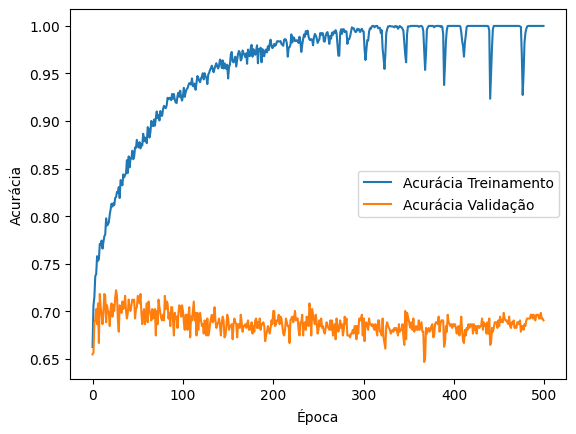

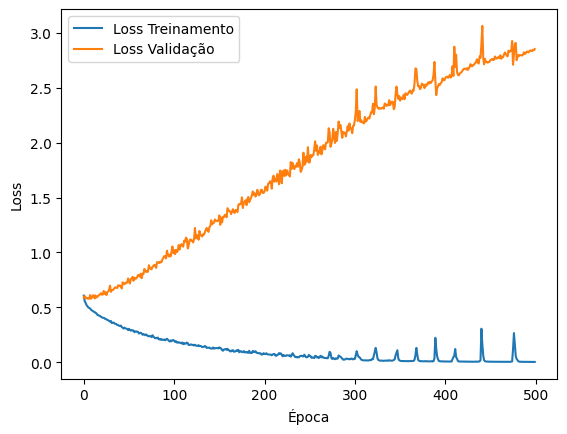

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

# Carregar os dados
df_no_autism_anthropometric = pd.read_csv("../../data/preprocessed_landmark/face_mesh_distances_no_autism_3.0.csv")
df_with_autism_anthropometric = pd.read_csv("../../data/preprocessed_landmark/face_mesh_distances_with_autism_3.0.csv")

# Supondo que você já tenha processado os dados e tem as variáveis X e y
# X -> características (inputs), y -> rótulos (outputs)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir uma função para criar o modelo, com hiperparâmetros ajustáveis
def build_model(hp):
    model = Sequential()
    
    # Camada de entrada com hiperparâmetro para ajustar o número de neurônios
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=128, step=32), 
                    input_dim=X_train.shape[1], activation='relu'))
    
    # Adicionando camadas ocultas, ajustando o número de camadas ocultas
    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32), activation='relu'))
    
    # Camada de saída
    model.add(Dense(1, activation='sigmoid'))

    # Compilar o modelo com ajuste da taxa de aprendizado
    model.compile(optimizer=Adam(learning_rate=hp.Float('lr', min_value=1e-5, max_value=1e-2, sampling='LOG')), 
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Definir o tuner para otimização de hiperparâmetros
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Otimizar para acurácia de validação
    max_trials=10,             # Quantidade de tentativas de combinações diferentes de hiperparâmetros
    executions_per_trial=2,    # Treinar cada combinação de hiperparâmetros duas vezes
    directory='my_dir',        # Diretório para salvar os logs
    project_name='hyperparameter_optimization'
)

# Definir a busca de hiperparâmetros
tuner.search_space_summary()

# Realizar a busca
tuner.search(X_train, y_train, 
             epochs=50, 
             batch_size=32, 
             validation_data=(X_test, y_test))

# Obter os melhores hiperparâmetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Treinar o modelo final com os melhores hiperparâmetros
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

# Avaliar o desempenho no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Desempenho no conjunto de teste - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

# Plotar o histórico de treinamento
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()


Trial 10 Complete [00h 00m 38s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 06m 01s
Epoch 1/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8706 - loss: 0.3493 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 2/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 7.7242e-04
Epoch 3/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.2171e-04 - val_accuracy: 1.0000 - val_loss: 3.8131e-04
Epoch 4/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.4858e-04 - val_accuracy: 1.0000 - val_loss: 2.3791e-04
Epoch 5/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.1791e-04 - val_accuracy: 1.0000 - val_loss: 1.6303e-04
Epoch 6/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.6005e-04 - val_accuracy: 1.0000 - val_loss: 1.1776e-04
Epoch 7/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.7029e-05 

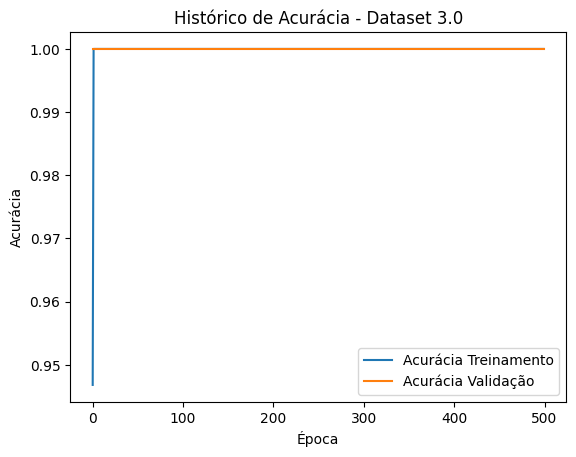

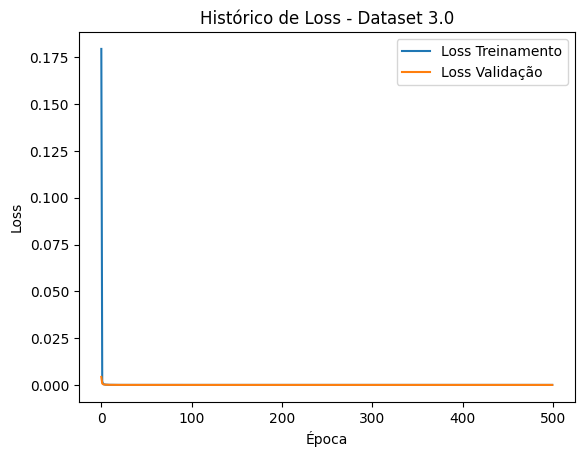

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt

# Função para carregar e processar os dados
def load_and_prepare_data(dataset_suffix):
    # Carregar os arquivos CSV com base no sufixo
    df_no_autism_anthropometric = pd.read_csv(f"../../data/preprocessed_landmark/face_mesh_distances_no_autism_{dataset_suffix}.csv")
    df_with_autism_anthropometric = pd.read_csv(f"../../data/preprocessed_landmark/face_mesh_distances_with_autism_{dataset_suffix}.csv")

    # Supondo que temos as colunas de interesse e a coluna de rótulo pronta
    df_no_autism_anthropometric['label'] = 0
    df_with_autism_anthropometric['label'] = 1

    # Concatenar os dois DataFrames
    df_combined = pd.concat([df_no_autism_anthropometric, df_with_autism_anthropometric])

    # Separar em X (características) e y (rótulos)
    X = df_combined.drop('label', axis=1)
    y = df_combined['label']

    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Definir a função para construir o modelo
def build_model(hp):
    model = Sequential()
    
    # Camada de entrada com hiperparâmetro para ajustar o número de neurônios
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=128, step=32), 
                    input_dim=X_train.shape[1], activation='relu'))
    
    # Adicionando camadas ocultas, ajustando o número de camadas ocultas
    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32), activation='relu'))
    
    # Camada de saída
    model.add(Dense(1, activation='sigmoid'))

    # Compilar o modelo com ajuste da taxa de aprendizado
    model.compile(optimizer=Adam(learning_rate=hp.Float('lr', min_value=1e-5, max_value=1e-2, sampling='LOG')), 
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Loop para processar os três datasets diferentes
for dataset_suffix in ['1.0', '2.0', '3.0']:
    print(f"\n--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_{dataset_suffix}.csv ---")
    
    # Carregar e preparar os dados para cada conjunto de dados
    X_train, X_test, y_train, y_test = load_and_prepare_data(dataset_suffix)
    
    # Definir o tuner para otimização de hiperparâmetros
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',  # Otimizar para acurácia de validação
        max_trials=10,             # Quantidade de tentativas de combinações diferentes de hiperparâmetros
        executions_per_trial=2,    # Treinar cada combinação de hiperparâmetros duas vezes
        directory='my_dir',        # Diretório para salvar os logs
        project_name=f'hyperparameter_optimization_{dataset_suffix}'
    )

    # Realizar a busca de hiperparâmetros
    tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

    # Obter os melhores hiperparâmetros
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Treinar o modelo final com os melhores hiperparâmetros
    model = tuner.hypermodel.build(best_hps)
    history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

    # Avaliar o desempenho no conjunto de teste
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Desempenho no conjunto de teste - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

    # Plotar o histórico de treinamento
    plt.figure()
    plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.title(f'Histórico de Acurácia - Dataset {dataset_suffix}')
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'], label='Loss Treinamento')
    plt.plot(history.history['val_loss'], label='Loss Validação')
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Histórico de Loss - Dataset {dataset_suffix}')
    plt.show()


<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 70px;">
    <h3 style="margin: 0;">Comparações utilizando diferentes subconjuntos de dados</h3>
</div>

Abaixo serão comparados utilizando os 3 subconjuntos de dados que foram feitos, o primeiro consiste em todas as fotos de autismo, no segundo, apeanas e terceiro, fez-se uma pré-processamento que consistiu em deletar fotos foram do padrão de testes (que não eram frontais).

In [27]:
import pandas as pd

# Função para carregar e processar os dados e capturar os tamanhos
def load_and_get_sizes(dataset_suffix):
    # Carregar os arquivos CSV com base no sufixo
    df_no_autism_anthropometric = pd.read_csv(f"../../data/preprocessed_landmark/face_mesh_distances_no_autism_{dataset_suffix}.csv")
    df_with_autism_anthropometric = pd.read_csv(f"../../data/preprocessed_landmark/face_mesh_distances_with_autism_{dataset_suffix}.csv")

    # Capturar os tamanhos dos dados carregados
    size_no_autism = df_no_autism_anthropometric.shape
    size_with_autism = df_with_autism_anthropometric.shape

    # Retornar os tamanhos
    return size_no_autism, size_with_autism

# Lista para armazenar os tamanhos
sizes_summary = []

# Loop para processar os três datasets diferentes
for dataset_suffix in ['1.0', '2.0', '3.0']:
    print(f"\n--- Carregando dados do dataset: face_mesh_distances_no_autism_{dataset_suffix}.csv ---")
    
    # Obter os tamanhos dos datasets
    size_no_autism, size_with_autism = load_and_get_sizes(dataset_suffix)
    
    # Armazenar os tamanhos na lista
    sizes_summary.append({
        'Dataset': dataset_suffix,
        'No_Autism_Rows': size_no_autism[0],
        'No_Autism_Columns': size_no_autism[1],
        'With_Autism_Rows': size_with_autism[0],
        'With_Autism_Columns': size_with_autism[1]
    })

# Criar DataFrame com os tamanhos armazenados
sizes_df = pd.DataFrame(sizes_summary)

# Exibir a tabela de tamanhos
print(sizes_df)


--- Carregando dados do dataset: face_mesh_distances_no_autism_1.0.csv ---

--- Carregando dados do dataset: face_mesh_distances_no_autism_2.0.csv ---

--- Carregando dados do dataset: face_mesh_distances_no_autism_3.0.csv ---
  Dataset  No_Autism_Rows  No_Autism_Columns  With_Autism_Rows  \
0     1.0            1468                 32              1468   
1     2.0            1279                 32              1307   
2     3.0            1243                 41              1273   

   With_Autism_Columns  
0                   32  
1                   32  
2                   41  



<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Otimização de hiperparâmetros de Rede Nureal</h4>
</div>


In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Função para carregar e processar os dados
def load_and_prepare_data(dataset_suffix):
    # Carregar os arquivos CSV com base no sufixo
    df_no_autism_anthropometric = pd.read_csv(f"../../data/preprocessed_landmark/face_mesh_distances_no_autism_{dataset_suffix}.csv")
    df_with_autism_anthropometric = pd.read_csv(f"../../data/preprocessed_landmark/face_mesh_distances_with_autism_{dataset_suffix}.csv")

    # Supondo que temos as colunas de interesse e a coluna de rótulo pronta
    df_no_autism_anthropometric['label'] = 0
    df_with_autism_anthropometric['label'] = 1

    # Concatenar os dois DataFrames
    df_combined = pd.concat([df_no_autism_anthropometric, df_with_autism_anthropometric])

    # Separar em X (características) e y (rótulos)
    X = df_combined.drop('label', axis=1)
    y = df_combined['label']

    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Definir uma função para construir o modelo
def build_model(num_layers, units_per_layer, learning_rate):
    model = Sequential()
    
    # Camada de entrada
    model.add(Dense(units=units_per_layer[0], input_dim=X_train.shape[1], activation='relu'))
    
    # Adicionar as camadas ocultas
    for i in range(1, num_layers):
        model.add(Dense(units=units_per_layer[i], activation='relu'))
    
    # Camada de saída
    model.add(Dense(1, activation='sigmoid'))

    # Compilar o modelo
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Definir as combinações de hiperparâmetros
num_layers_options = [1, 2, 3]  # Número de camadas ocultas
neurons_options = [32, 64, 128]  # Quantidade de neurônios por camada
learning_rate_options = [0.01, 0.001, 0.0001]  # Taxas de aprendizado
epochs_options = [10, 15, 30, 100, 200, 300, 500]  # Números de épocas

# Lista para armazenar os resultados
results_summary = []

# Loop para processar os três datasets diferentes
for dataset_suffix in ['1.0', '2.0', '3.0']:
    print(f"\n--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_{dataset_suffix}.csv ---")
    
    # Carregar e preparar os dados para cada conjunto de dados
    X_train, X_test, y_train, y_test = load_and_prepare_data(dataset_suffix)
    
    # Iterar sobre todas as combinações de hiperparâmetros
    for num_layers in num_layers_options:
        for neurons in neurons_options:
            for learning_rate in learning_rate_options:
                for epochs in epochs_options:
                    
                    # Definir a quantidade de neurônios em cada camada
                    units_per_layer = [neurons] * num_layers  # Mesma quantidade de neurônios por camada
                    
                    # Construir o modelo
                    model = build_model(num_layers, units_per_layer, learning_rate)
                    
                    # Treinar o modelo
                    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=0)
                    
                    # Avaliar o desempenho no conjunto de teste
                    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
                    
                    # Armazenar os resultados na lista
                    results_summary.append({
                        'Dataset': dataset_suffix,
                        'Num_Layers': num_layers,
                        'Neurons_Per_Layer': neurons,
                        'Learning_Rate': learning_rate,
                        'Epochs': epochs,
                        'Test_Accuracy': test_accuracy,
                        'Test_Loss': test_loss
                    })

# Após o loop, exibir os resultados em uma nova célula
import pandas as pd

# Criar DataFrame com os resultados armazenados
results_df_RN = pd.DataFrame(results_summary)

# Exibir a tabela de resultados
display(results_df_RN)



--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_1.0.csv ---


c:\Users\georg\Desktop\Analise_Autismo\AutismDetectWithML\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_2.0.csv ---


c:\Users\georg\Desktop\Analise_Autismo\AutismDetectWithML\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_3.0.csv ---


c:\Users\georg\Desktop\Analise_Autismo\AutismDetectWithML\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,Dataset,Num_Layers,Neurons_Per_Layer,Learning_Rate,Epochs,Test_Accuracy,Test_Loss
0,1.0,1,32,0.0100,10,1.0,1.369051e-04
1,1.0,1,32,0.0100,15,1.0,5.871274e-05
2,1.0,1,32,0.0100,30,1.0,1.802290e-05
3,1.0,1,32,0.0100,100,1.0,4.080252e-07
4,1.0,1,32,0.0100,200,1.0,1.368462e-08
...,...,...,...,...,...,...,...
562,3.0,3,128,0.0001,30,1.0,2.218188e-04
563,3.0,3,128,0.0001,100,1.0,6.962125e-06
564,3.0,3,128,0.0001,200,1.0,1.686705e-07
565,3.0,3,128,0.0001,300,1.0,9.893449e-09


In [23]:
display(results_df)

,Dataset,Num_Layers,Neurons_Per_Layer,Learning_Rate,Epochs,Test_Accuracy,Test_Loss
0,1.0,1,32,0.0100,10,1.0,1.369051e-04
1,1.0,1,32,0.0100,15,1.0,5.871274e-05
2,1.0,1,32,0.0100,30,1.0,1.802290e-05
3,1.0,1,32,0.0100,100,1.0,4.080252e-07
4,1.0,1,32,0.0100,200,1.0,1.368462e-08
...,...,...,...,...,...,...,...
562,3.0,3,128,0.0001,30,1.0,2.218188e-04
563,3.0,3,128,0.0001,100,1.0,6.962125e-06
564,3.0,3,128,0.0001,200,1.0,1.686705e-07
565,3.0,3,128,0.0001,300,1.0,9.893449e-09


<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Teste de Hiperparâmetros com KNN</h4>
</div>


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss

# Função para carregar e processar os dados
def load_and_prepare_data(dataset_suffix):
    # Carregar os arquivos CSV com base no sufixo
    df_no_autism_anthropometric = pd.read_csv(f"../../data/preprocessed_landmark/face_mesh_distances_no_autism_{dataset_suffix}.csv")
    df_with_autism_anthropometric = pd.read_csv(f"../../data/preprocessed_landmark/face_mesh_distances_with_autism_{dataset_suffix}.csv")

    # Supondo que temos as colunas de interesse e a coluna de rótulo pronta
    df_no_autism_anthropometric['label'] = 0
    df_with_autism_anthropometric['label'] = 1

    # Concatenar os dois DataFrames
    df_combined = pd.concat([df_no_autism_anthropometric, df_with_autism_anthropometric])

    # Separar em X (características) e y (rótulos)
    X = df_combined.drop('label', axis=1)
    y = df_combined['label']

    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Definir as combinações de hiperparâmetros
n_neighbors_options = [3, 5, 7, 9]  # Quantidade de vizinhos
weights_options = ['uniform', 'distance']  # Tipos de pesos
metric_options = ['euclidean', 'manhattan']  # Tipos de métricas

# Lista para armazenar os resultados
results_summary = []

# Loop para processar os três datasets diferentes
for dataset_suffix in ['1.0', '2.0', '3.0']:
    print(f"\n--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_{dataset_suffix}.csv ---")
    
    # Carregar e preparar os dados para cada conjunto de dados
    X_train, X_test, y_train, y_test = load_and_prepare_data(dataset_suffix)
    
    # Iterar sobre todas as combinações de hiperparâmetros
    for n_neighbors in n_neighbors_options:
        for weights in weights_options:
            for metric in metric_options:
                
                # Construir o modelo KNN com os hiperparâmetros
                knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
                
                # Treinar o modelo
                knn.fit(X_train, y_train)
                
                # Fazer previsões
                y_pred = knn.predict(X_test)
                y_prob = knn.predict_proba(X_test)
                
                # Avaliar o desempenho
                test_accuracy = accuracy_score(y_test, y_pred)
                test_loss = log_loss(y_test, y_prob)
                
                # Armazenar os resultados na lista
                results_summary.append({
                    'Dataset': dataset_suffix,
                    'N_Neighbors': n_neighbors,
                    'Weights': weights,
                    'Metric': metric,
                    'Test_Accuracy': test_accuracy,
                    'Test_Loss': test_loss
                })

# Após o loop, exibir os resultados em uma nova célula
import pandas as pd

# Criar DataFrame com os resultados armazenados
results_df_KNN = pd.DataFrame(results_summary)

# Exibir a tabela de resultados
display(results_df_KNN)



--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_1.0.csv ---

--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_2.0.csv ---

--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_3.0.csv ---


,Dataset,N_Neighbors,Weights,Metric,Test_Accuracy,Test_Loss
0,1.0,3,uniform,euclidean,0.982993,0.031786
1,1.0,3,uniform,manhattan,0.926871,0.695893
2,1.0,3,distance,euclidean,0.982993,0.030623
3,1.0,3,distance,manhattan,0.926871,0.690631
4,1.0,5,uniform,euclidean,0.986395,0.036214
5,1.0,5,uniform,manhattan,0.937075,0.246234
6,1.0,5,distance,euclidean,0.986395,0.034740
7,1.0,5,distance,manhattan,0.937075,0.239746
8,1.0,7,uniform,euclidean,0.989796,0.049840
9,1.0,7,uniform,manhattan,0.947279,0.200933


<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Teste de Hiperparâmetros com Random Forest</h4>
</div>


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Função para carregar e processar os dados
def load_and_prepare_data(dataset_suffix):
    # Carregar os arquivos CSV com base no sufixo
    df_no_autism_anthropometric = pd.read_csv(f"../../data/preprocessed_landmark/face_mesh_distances_no_autism_{dataset_suffix}.csv")
    df_with_autism_anthropometric = pd.read_csv(f"../../data/preprocessed_landmark/face_mesh_distances_with_autism_{dataset_suffix}.csv")

    # Supondo que temos as colunas de interesse e a coluna de rótulo pronta
    df_no_autism_anthropometric['label'] = 0
    df_with_autism_anthropometric['label'] = 1

    # Concatenar os dois DataFrames
    df_combined = pd.concat([df_no_autism_anthropometric, df_with_autism_anthropometric])

    # Separar em X (características) e y (rótulos)
    X = df_combined.drop('label', axis=1)
    y = df_combined['label']

    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Definir as combinações de hiperparâmetros
n_estimators_options = [100, 200, 300]  # Número de árvores na floresta
max_depth_options = [5, 10, 20, None]  # Profundidade máxima da árvore
min_samples_split_options = [2, 5, 10]  # Número mínimo de amostras para dividir um nó
min_samples_leaf_options = [1, 2, 4]  # Número mínimo de amostras em uma folha
criterion_options = ['gini', 'entropy']  # Critério para medir a qualidade de uma divisão

# Lista para armazenar os resultados
results_summary = []

# Loop para processar os três datasets diferentes
for dataset_suffix in ['1.0', '2.0', '3.0']:
    print(f"\n--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_{dataset_suffix}.csv ---")
    
    # Carregar e preparar os dados para cada conjunto de dados
    X_train, X_test, y_train, y_test = load_and_prepare_data(dataset_suffix)
    
    # Iterar sobre todas as combinações de hiperparâmetros
    for n_estimators in n_estimators_options:
        for max_depth in max_depth_options:
            for min_samples_split in min_samples_split_options:
                for min_samples_leaf in min_samples_leaf_options:
                    for criterion in criterion_options:
                        
                        # Construir o modelo Random Forest com os hiperparâmetros
                        rf = RandomForestClassifier(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            criterion=criterion,
                            random_state=42
                        )
                        
                        # Treinar o modelo
                        rf.fit(X_train, y_train)
                        
                        # Fazer previsões
                        y_pred = rf.predict(X_test)
                        y_prob = rf.predict_proba(X_test)
                        
                        # Avaliar o desempenho
                        test_accuracy = accuracy_score(y_test, y_pred)
                        test_loss = log_loss(y_test, y_prob)
                        
                        # Armazenar os resultados na lista
                        results_summary.append({
                            'Dataset': dataset_suffix,
                            'N_Estimators': n_estimators,
                            'Max_Depth': max_depth,
                            'Min_Samples_Split': min_samples_split,
                            'Min_Samples_Leaf': min_samples_leaf,
                            'Criterion': criterion,
                            'Test_Accuracy': test_accuracy,
                            'Test_Loss': test_loss
                        })

# Após o loop, exibir os resultados em uma nova célula
import pandas as pd

# Criar DataFrame com os resultados armazenados
results_df_2 = pd.DataFrame(results_summary)

# Exibir a tabela de resultados
display(results_df_2)



--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_1.0.csv ---

--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_2.0.csv ---

--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_3.0.csv ---


,Dataset,N_Estimators,Max_Depth,Min_Samples_Split,Min_Samples_Leaf,Criterion,Test_Accuracy,Test_Loss
0,1.0,100,5.0,2,1,gini,1.0,0.173716
1,1.0,100,5.0,2,1,entropy,1.0,0.181456
2,1.0,100,5.0,2,2,gini,1.0,0.177605
3,1.0,100,5.0,2,2,entropy,1.0,0.182641
4,1.0,100,5.0,2,4,gini,1.0,0.177603
...,...,...,...,...,...,...,...,...
643,3.0,300,NaN,10,1,entropy,1.0,0.093032
644,3.0,300,NaN,10,2,gini,1.0,0.103147
645,3.0,300,NaN,10,2,entropy,1.0,0.097842
646,3.0,300,NaN,10,4,gini,1.0,0.113868


<div style="background-color: #369831; border: 2px solid #369831; border-radius: 10px; display: flex; justify-content: center; align-items: center; height: 50px;">
    <h4 style="margin: 0;">Teste de Hiperparâmetros com SVN</h4>
</div>


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

# Função para carregar e processar os dados
def load_and_prepare_data(dataset_suffix):
    # Carregar os arquivos CSV com base no sufixo
    df_no_autism_anthropometric = pd.read_csv(f"../../data/preprocessed_landmark/face_mesh_distances_no_autism_{dataset_suffix}.csv")
    df_with_autism_anthropometric = pd.read_csv(f"../../data/preprocessed_landmark/face_mesh_distances_with_autism_{dataset_suffix}.csv")

    # Supondo que temos as colunas de interesse e a coluna de rótulo pronta
    df_no_autism_anthropometric['label'] = 0
    df_with_autism_anthropometric['label'] = 1

    # Concatenar os dois DataFrames
    df_combined = pd.concat([df_no_autism_anthropometric, df_with_autism_anthropometric])

    # Separar em X (características) e y (rótulos)
    X = df_combined.drop('label', axis=1)
    y = df_combined['label']

    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Definir as combinações de hiperparâmetros
C_options = [0.1, 1, 10, 100]  # Parâmetro de regularização
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']  # Tipos de kernel
gamma_options = ['scale', 'auto']  # Coeficiente de kernel
degree_options = [2, 3, 4]  # Graus para kernel polinomial (usado quando kernel='poly')

# Lista para armazenar os resultados
results_summary = []

# Loop para processar os três datasets diferentes
for dataset_suffix in ['1.0', '2.0', '3.0']:
    print(f"\n--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_{dataset_suffix}.csv ---")
    
    # Carregar e preparar os dados para cada conjunto de dados
    X_train, X_test, y_train, y_test = load_and_prepare_data(dataset_suffix)
    
    # Iterar sobre todas as combinações de hiperparâmetros
    for C in C_options:
        for kernel in kernel_options:
            for gamma in gamma_options:
                
                # Se o kernel for 'poly', também testamos diferentes graus
                if kernel == 'poly':
                    for degree in degree_options:
                        # Construir o modelo SVM com os hiperparâmetros
                        svm = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree, probability=True)
                        
                        # Treinar o modelo
                        svm.fit(X_train, y_train)
                        
                        # Fazer previsões
                        y_pred = svm.predict(X_test)
                        y_prob = svm.predict_proba(X_test)
                        
                        # Avaliar o desempenho
                        test_accuracy = accuracy_score(y_test, y_pred)
                        test_loss = log_loss(y_test, y_prob)
                        
                        # Armazenar os resultados na lista
                        results_summary.append({
                            'Dataset': dataset_suffix,
                            'C': C,
                            'Kernel': kernel,
                            'Gamma': gamma,
                            'Degree': degree,
                            'Test_Accuracy': test_accuracy,
                            'Test_Loss': test_loss
                        })
                else:
                    # Para outros kernels, não usamos o parâmetro degree
                    svm = SVC(C=C, kernel=kernel, gamma=gamma, probability=True)
                    
                    # Treinar o modelo
                    svm.fit(X_train, y_train)
                    
                    # Fazer previsões
                    y_pred = svm.predict(X_test)
                    y_prob = svm.predict_proba(X_test)
                    
                    # Avaliar o desempenho
                    test_accuracy = accuracy_score(y_test, y_pred)
                    test_loss = log_loss(y_test, y_prob)
                    
                    # Armazenar os resultados na lista
                    results_summary.append({
                        'Dataset': dataset_suffix,
                        'C': C,
                        'Kernel': kernel,
                        'Gamma': gamma,
                        'Degree': None,
                        'Test_Accuracy': test_accuracy,
                        'Test_Loss': test_loss
                    })

# Após o loop, exibir os resultados em uma nova célula
import pandas as pd

# Criar DataFrame com os resultados armazenados
results_df_3 = pd.DataFrame(results_summary)

# Exibir a tabela de resultados
display(results_df_3)



--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_1.0.csv ---

--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_2.0.csv ---

--- Treinando e otimizando com dataset: face_mesh_distances_no_autism_3.0.csv ---


,Dataset,C,Kernel,Gamma,Degree,Test_Accuracy,Test_Loss
0,1.0,0.1,linear,scale,NaN,1.000000,0.000431
1,1.0,0.1,linear,auto,NaN,1.000000,0.000431
2,1.0,0.1,poly,scale,2.0,0.612245,0.641567
3,1.0,0.1,poly,scale,3.0,0.994898,0.012506
4,1.0,0.1,poly,scale,4.0,0.641156,0.602915
...,...,...,...,...,...,...,...
139,3.0,100.0,poly,auto,4.0,0.742063,0.548372
140,3.0,100.0,rbf,scale,NaN,1.000000,0.000651
141,3.0,100.0,rbf,auto,NaN,1.000000,0.000679
142,3.0,100.0,sigmoid,scale,NaN,0.658730,0.596191


## Resultados

Até o presente momento, tentou-se:

### Sem processar o dataset
#### Com 68 pontos:
Obteve-se na média de 66%

#### Com Face Mesh:
Obteve-se como melhor resultado, até o presente momento, 73.47%. Estes resultados foram utilizando TODOS os pontos do dataset.
Já utilizando as medições antropométricas, obteve-se próximo ao valor médio próximo a 66%. Sem muita diferença do primeiro caso citado. O que faz sentido, já que ambos métodos obtem medições próximas.

### Com alteração do dataset

#### Com Face Mesh:
Após excluir imagens por meio de critérios de padronização, testando com o "novo" dataset, obteve-se resultados melhores, atingindo com SVN, 71,43%, consideravelmente maior, considerando que para o mesmo algoritmo, obteve-se 66% anteriormente. 
Para o teste com todos os pontos, foi obtido 70.46%. Sendo evidênciado que, para a quantidade de dados altera, já demonstra resultados equivalentes ou levemente melhores ao utilizar as distâncias. Valendo ressaltar que, o tempo de treinamento é significativamente menor ao comparar a utilização das distâncias calculadas em relação a todos os pontos do Face Mesh.

#### Combinando técnicas
Foi percebido que a correlação tanto dos dados pelo csv, alguns pontos específicos, quanto de algumas medidas obtida ao reduzir o dataset, tiveram valores interessantes. 
Ainda não é uma correlação muito boa, mas poderia ser interessante a combinação de ambas ideias em uma só. Assim tem-se: Os pontos de maior correlação, mas reduzindo a amostra (mais rápido do que todos pontos da Face Mesh) e as medidas de maior correlação. Obteu-se 69.8%, para aumentar a precisão, tentara-se novamente trabalhar no dataset e revisar os dados.


### Com a segunda alteração do dataset

#### Com Face Mesh:
Desta vez, foi obtido na volta de 75% de precisão utilizando as medições faciais, utilizando todas as medições.
Tentando combinar pontos e medições, 
